# Convolutional Neural Networks Lab

Welcome to the Convolutional Neural Networks lab! By the end of this lab, you will have

- Defined a convolutional neural network architecture in keras
- Trained it on MNIST to recognize handwritten digits
- Visualized the learned filters

Let's get started!

## Load the Data

Since tensorflow expects images with shape `(height, width, channels)` we need to convert the dimensions of the MNIST images.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import array_to_img, img_to_array
import keras as keras

[X, y], _ = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = np.expand_dims(X, axis=1).astype(np.float)
imgs = [array_to_img(x, data_format='channels_first') for x in X]
X = np.array([img_to_array(img, data_format='channels_last') for img in imgs]) / 255. #normalize the data
y = np.array([img_to_array(img, data_format='channels_last') for img in imgs]) / 255

Using TensorFlow backend.


In [2]:
X .shape

(60000, 28, 28, 1)

In [3]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
y_train.shape

(60000, 10)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_reshaped = X.reshape(60000,784,1)

In [9]:
imgs [0]

## Define the Architecture

We will now define the following CNN architecture

$$
\mathbf{X} \in \mathbb{R}^{28 \times 28 \times 1}
\longrightarrow
\text{Conv}
\longrightarrow
\text{ReLU}
\longrightarrow
\text{Max Pool}
\longrightarrow
\text{Flatten}
\longrightarrow
\text{Dense}
\longrightarrow
\text{Softmax}
\longrightarrow
\mathbf{p} \in \mathbb{R}^{10}
$$

for classifying MNIST digits.

### Tasks

- Define this architecture

### Hints

- Check out the keras [core layers](https://keras.io/layers/core/), [convolutional](https://keras.io/layers/convolutional/), and [pooling](https://keras.io/layers/pooling/) documentation
- Use whatever hyperparameters you think are most appropriate

In [42]:
from keras.models import Sequential

In [43]:
from keras.layers import Dense, Conv1D, Conv2D, MaxPool1D, MaxPool2D, Flatten

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(input_shape=(28,28,1), kernel_size=8,filters=20, activation='relu', 
                 data_format='channels_last', kernel_constraint=keras.constraints.non_neg() ))

In [55]:
model.add(Conv2D(input_shape=(28,28,1), kernel_size=4,filters=10, activation='relu', 
                 data_format='channels_last', kernel_constraint=keras.constraints.non_neg() ))

In [56]:
model.add(MaxPool2D())

In [57]:
model.add(Conv2D(input_shape=(12,12,1), kernel_size=4,filters=5, activation='relu', 
                 data_format='channels_last', kernel_constraint=keras.constraints.non_neg() ))

In [58]:
model.add(MaxPool2D())

In [59]:
model.add(Flatten())

In [60]:
model.add(Dense(units=10, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 21, 21, 20)        1300      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 10)        3210      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 5)           805       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 5)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 45)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                460       
Total para

In [65]:
from keras.optimizers import SGD

In [66]:
sgd = SGD(lr=.3)

In [67]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [68]:
batch_size = 128
epochs = 5 # 20 is good number; But let's limit it to 5

In [69]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size, 
                    validation_split=.1,
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 98s - loss: 14.5176 - acc: 0.0993 - val_loss: 14.4918 - val_acc: 0.1009

In [72]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

 9984/10000 [============================>.] - ETA: 0s 

In [73]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.4917793915
Test accuracy: 0.1009


## Fit on MNIST

It's time to compile your model and fit it on MNSIT.

### Tasks

- Compile your model
- Fit it on MNIST

## Display Learned Filters

We can visualize what the CNN learned by displaying some of the filters in the convolutional layer.

### Tasks

- Display some filters from the convolutional layer

### Hints

- Examine `models.layers` and get a reference to the conv layer
- Use `keras.layers.Layer.get_weights()` to get the filter weights
- The filters `W` will be a `4darray` with shape `(F, F, 1, nb_filter)`. Use `W[..., i]` to get a reference to filter number `i`
- Use `keras.preprocessing.image.array_to_img()` to display it
- Try using `kernel_constraint=keras.constraints.non_neg()` to get cleaner filters in your convolution layer

In [74]:
model.layers

In [75]:
conv_layer = model.layers[0].get_weights()[0] # weights

In [76]:
conv_layer.shape

(8, 8, 1, 20)

In [77]:
from IPython.display import display

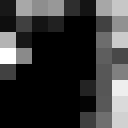

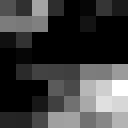

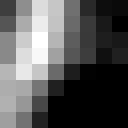

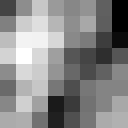

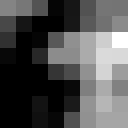

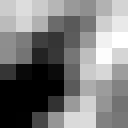

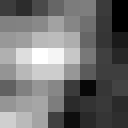

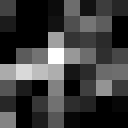

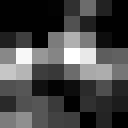

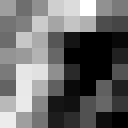

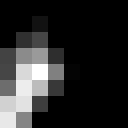

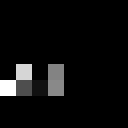

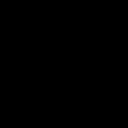

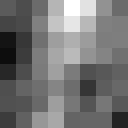

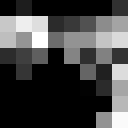

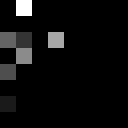

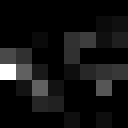

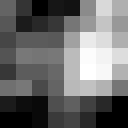

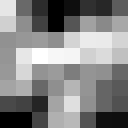

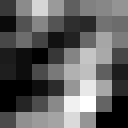

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [78]:
[display(array_to_img(conv_layer[:,:,:,i]).resize([128,128])) for i in range(20)]

## Go Crazy

- Try beating your top score from yesterday

### Tasks

- Perform hyperparameter searches to improve your MNIST score

### Hints

Try tweaking

- The number of convolutional blocks
- Stride
- Number of filters
- Max pooling size
- The number of Dense layers

### Requirements

- Only use sgd
- Train for a maximum of five epochs

## Bonus Activities

- Wrap your code to display filters in a keras callback and call it after every every epoch to see the filters update during training
- Associate each digit class with the filters whose strong activations provide the most evidence for the class (this would be cool!)